In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv(r"E:\Data Science\Competitons Data\time series\Train_SU63ISt.csv")
test=pd.read_csv(r"E:\Data Science\Competitons Data\time series\Test_0qrQsBZ.csv")

In [4]:
train_original=train.copy()
test_original=test.copy()

In [5]:
print(train.columns,test.columns)

Index(['ID', 'Datetime', 'Count'], dtype='object') Index(['ID', 'Datetime'], dtype='object')


In [6]:
print("This is the train dataset: \n")
train.info()
print("\n This is the test dataset: \n")
test.info()

This is the train dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB

 This is the test dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


In [7]:
train_original.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [8]:
#Converting to datetime objects.
train['Datetime']=pd.to_datetime(train.Datetime,format="%d-%m-%Y %H:%M")
test['Datetime']=pd.to_datetime(test.Datetime,format="%d-%m-%Y %H:%M")
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [9]:
#Now we see that previously where our Datetime column was object type, is now datetime64.
print("This is the train dataset: \n")
train.info()
print("\n This is the test dataset: \n")
test.info()

This is the train dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null datetime64[ns]
Count       18288 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.7 KB

 This is the test dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 80.0 KB


In [10]:
train.head(5)

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [11]:
for i in [train,test,train_original,test_original]:
    i['Year']=i.Datetime.dt.year
    i['Month']=i.Datetime.dt.month
    i['Day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [12]:
train.head(5)

,ID,Datetime,Count,Year,Month,Day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [13]:
train['Day of week']=train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [14]:
def weekdy(df):
    if df.dayofweek==5 or df.dayofweek==6:
        return 1
    else :
        return 0
    

In [15]:
train['weekday']=train['Datetime'].apply(weekdy)

In [16]:
train.head()

,ID,Datetime,Count,Year,Month,Day,Hour,Day of week,weekday
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [17]:
train.index=train['Datetime']

In [18]:
train.head()

,ID,Datetime,Count,Year,Month,Day,Hour,Day of week,weekday
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [19]:
df=train.drop(['ID'],axis=1)

In [20]:
ts=df['Count']  # type: object

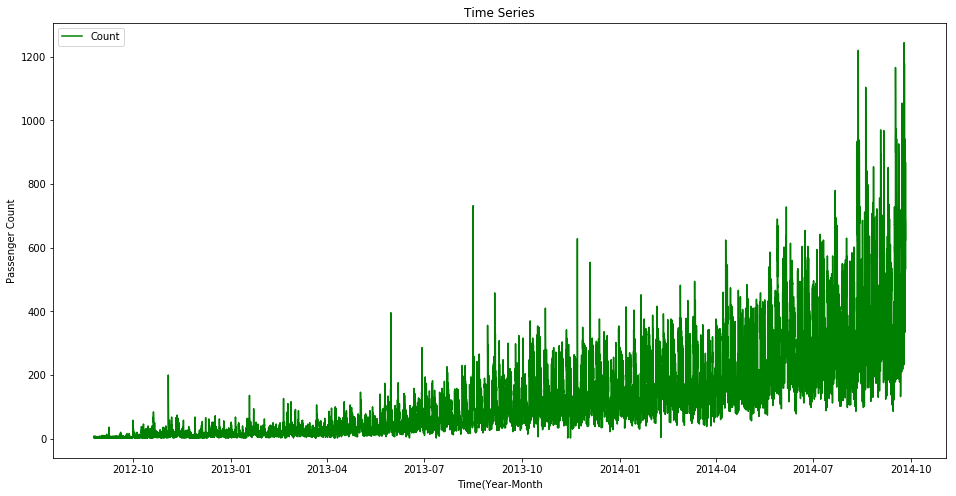

In [21]:
fig=plt.figure(figsize=(16,8))
plt.plot(ts,color='green')
plt.title("Time Series")
plt.xlabel("Time(Year-Month")
plt.ylabel("Passenger Count")
plt.legend(loc='best')
plt.show()

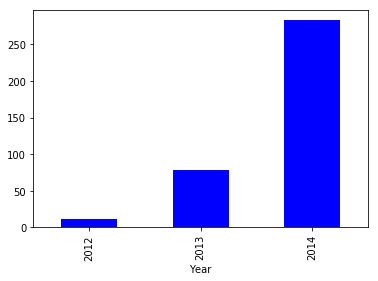

In [22]:
train.groupby('Year')['Count'].mean().plot.bar(color='blue')

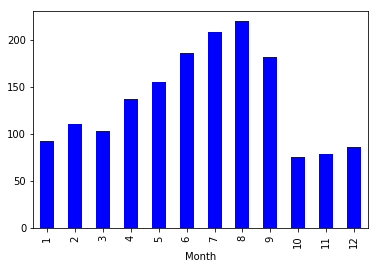

In [23]:
train.groupby('Month')['Count'].mean().plot.bar(color='blue')

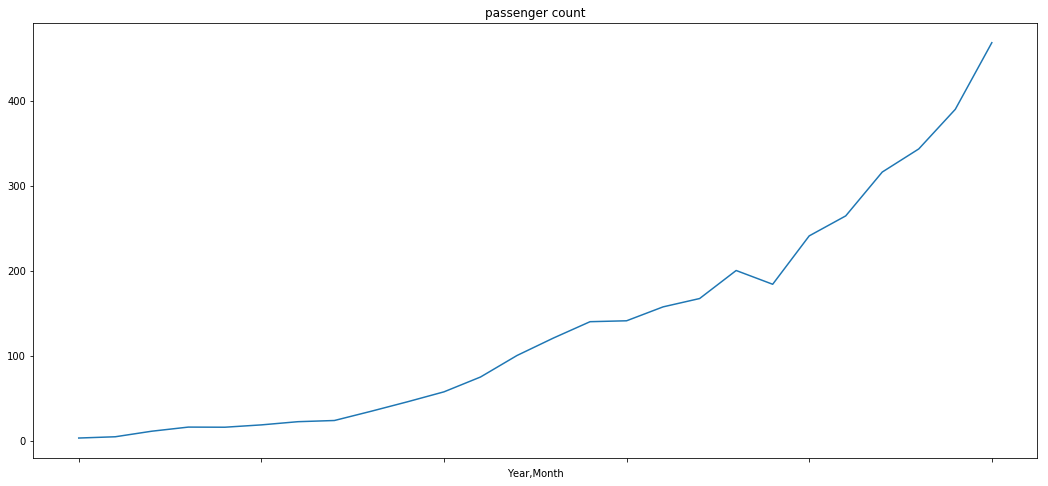

In [24]:
train.groupby(['Year', 'Month'])['Count'].mean().plot(figsize=(18,8),title='passenger count')

,ID,Datetime,Count,Year,Month,Day,Hour,Day of week,weekday
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


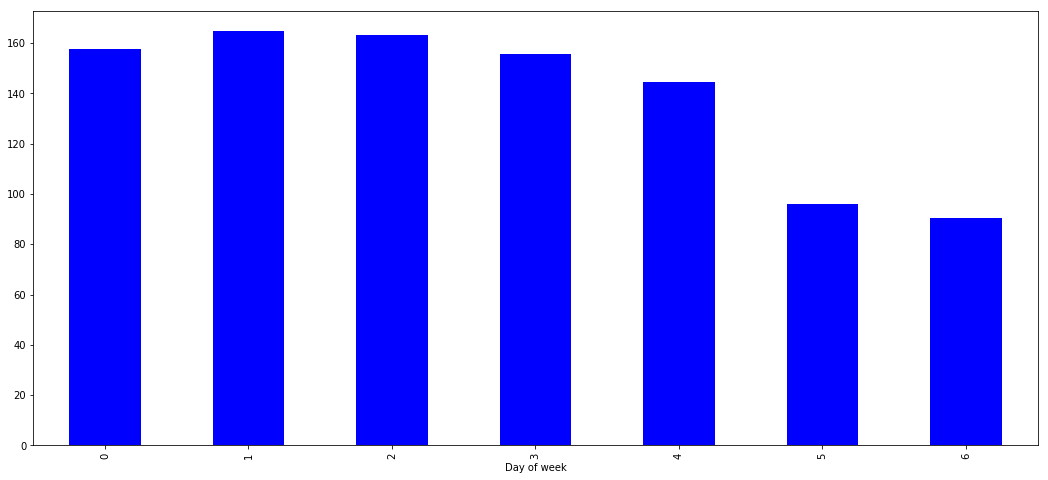

In [25]:
train.groupby('Day of week')['Count'].mean().plot(figsize=(18,8),kind='bar',color='blue')
train.head()

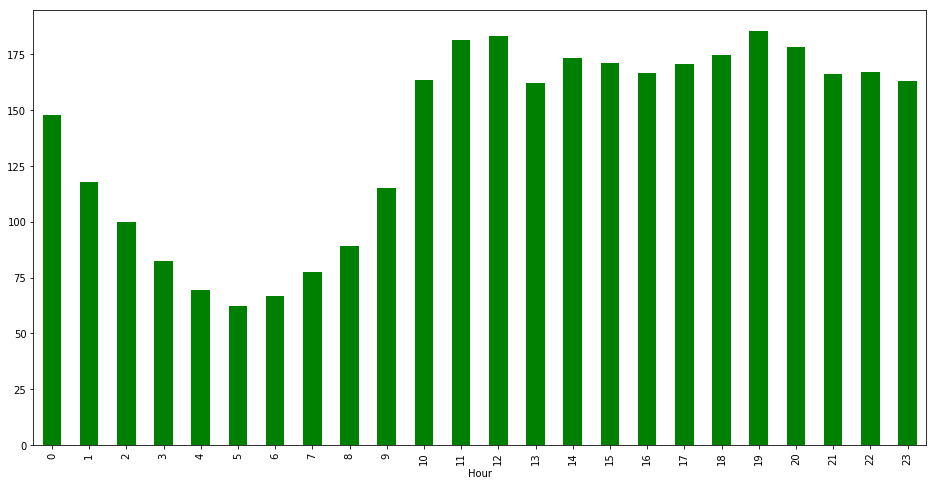

In [26]:
train.groupby('Hour')['Count'].mean().plot(figsize=(16,8),kind='bar',color='green',y='count')

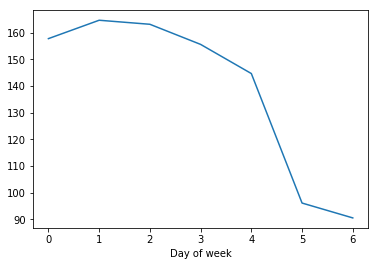

In [27]:
train.groupby('Day of week')['Count'].mean().plot()

In [28]:
train.drop('ID',axis=1,inplace=True)
train.head()

,Datetime,Count,Year,Month,Day,Hour,Day of week,weekday
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [29]:
train.Timestamp=pd.to_datetime(train.Datetime,
                               format='%d-%m-%Y %H:%M')

In [30]:
train.head()
train.index = train.Timestamp

In [31]:
hourly=train.resample('H').mean()
daily=train.resample('D').mean()
weekly=train.resample('W').mean()
monthly=train.resample('M').mean()

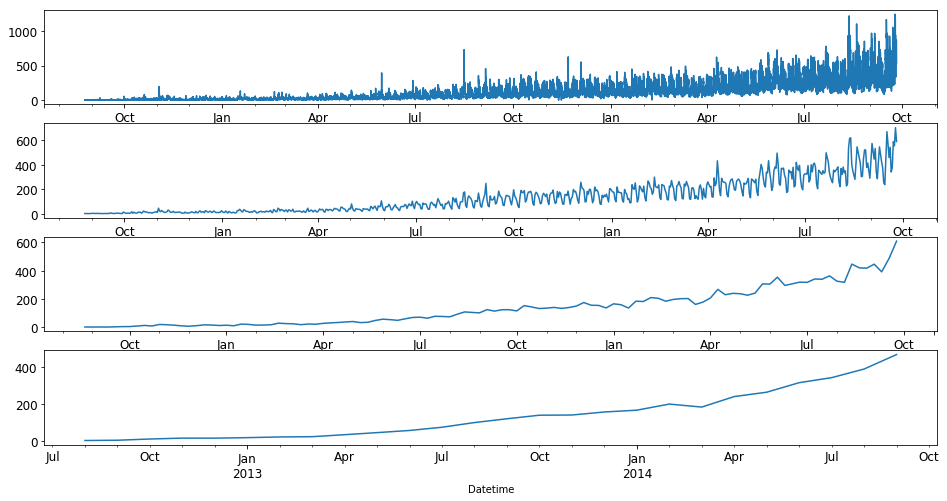

In [32]:
fig,ax=plt.subplots(4,1)
hourly['Count'].plot(ax=ax[0],figsize=(16,8),fontsize=12)
daily['Count'].plot(ax=ax[1],figsize=(16,8),fontsize=12)
weekly['Count'].plot(ax=ax[2],figsize=(16,8),fontsize=12)
monthly['Count'].plot(ax=ax[3],figsize=(16,8),fontsize=12)

In [33]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

In [34]:
Train=train.ix['2012-08-25':'2014-06-24']
valid=train.ix['2014-06-25':'2014-09-25']

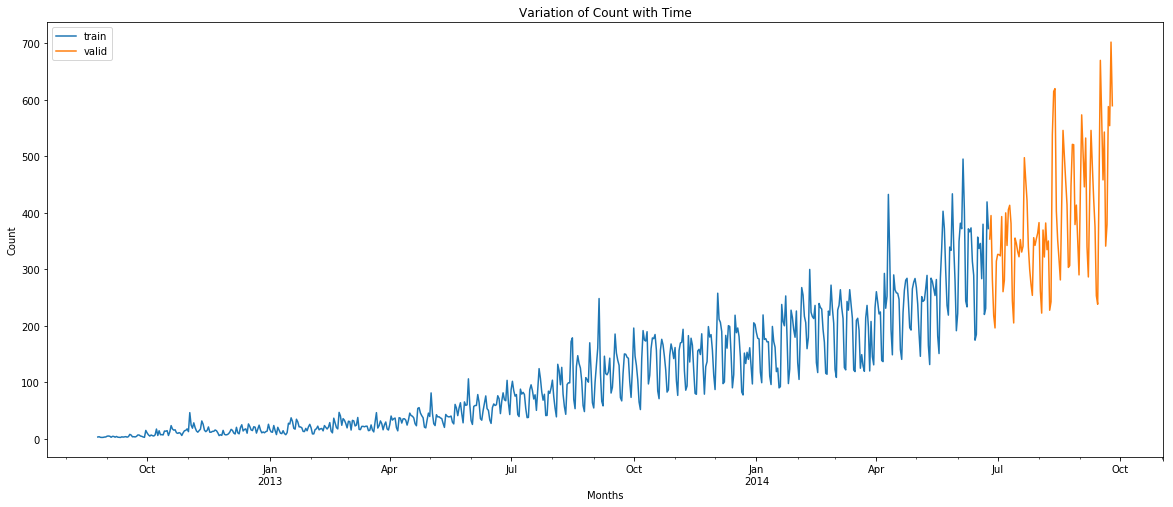

In [35]:
Train.Count.plot(label='train',
                 figsize=(20,8))
valid.Count.plot(label='valid',
                 figsize=(20,8))
plt.xlabel("Months")
plt.ylabel("Count")
plt.title("Variation of Count with Time")
plt.legend(loc='best')

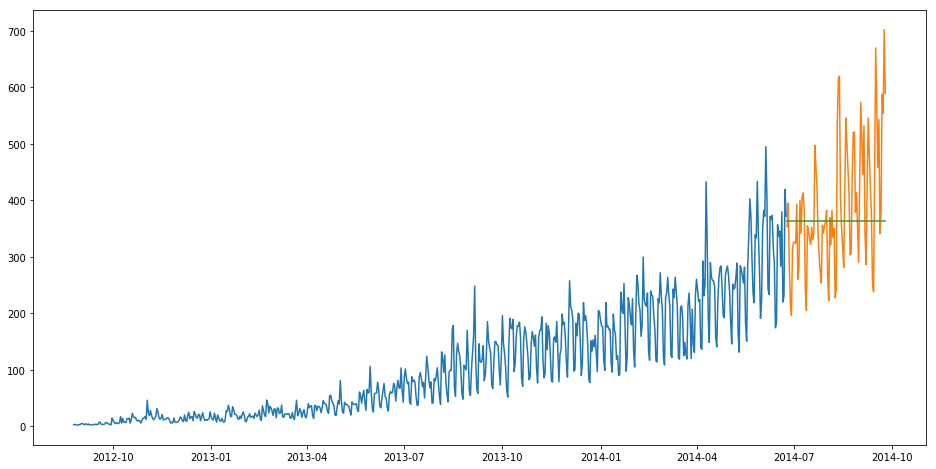

In [36]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
y_hat_avg=valid.copy()
fit2=SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,
                                                        optimized=False)
y_hat_avg['SES']=fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'])
plt.plot(valid['Count'])
plt.plot(y_hat_avg['SES'])


In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(valid.Count,y_hat_avg.SES))

In [38]:
print(rms)

113.43708111884514


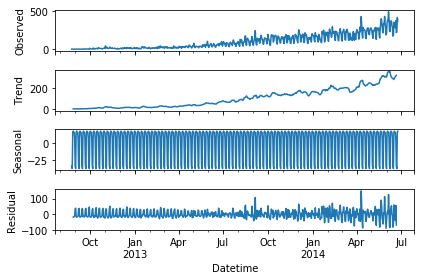

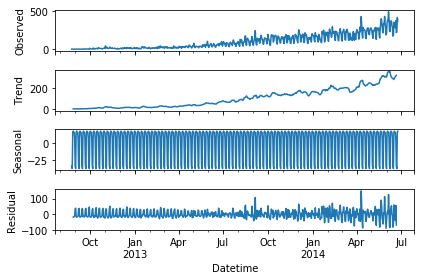

In [39]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()


In [40]:
y_hat_avg=valid.copy()
fit1=Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3,smoothing_slope=0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))
# y_hat_avg['Holt_linear']

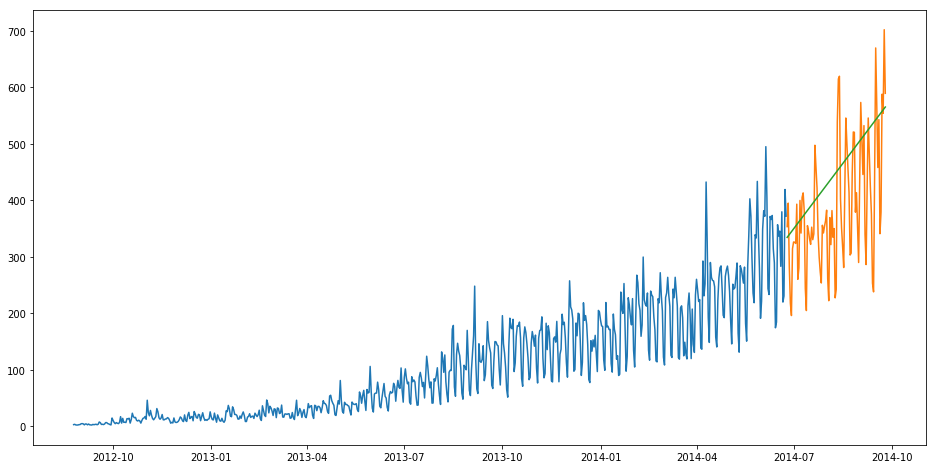

In [41]:
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_hat_avg['Holt_linear'])

In [42]:
submission=pd.read_csv(r'E:\Data Science\Competitons Data\time series\Sample_Submission_QChS6c3.csv')
predict=fit1.forecast(len(test))

In [43]:
test['prediction']=predict

In [62]:
# Calculating the hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum()

# Grouping the hourly ratio
temp=train_original.groupby(['Hour'])['ratio'].sum()
# Groupby to csv format
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv')

temp2=pd.read_csv("GROUPby.csv")
temp2=temp2.drop('Hour.1',1)
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('Day','Month', 'Year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['Year', 'Month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

In [63]:
print(merge.head())
print(prediction.head())

      ID_x   Day  prediction   ID_y  Hour
0  18299.5  26.0  334.650767  18288     0
1  18299.5  26.0  334.650767  18289     1
2  18299.5  26.0  334.650767  18290     2
3  18299.5  26.0  334.650767  18291     3
4  18299.5  26.0  334.650767  18292     4
      ID_x   Day  prediction   ID_y  Hour     ratio       Count     ID
0  18299.5  26.0  334.650767  18288     0  0.044287  355.692974  18288
1  18299.5  26.0  334.650767  18289     1  0.035343  283.861602  18289
2  18299.5  26.0  334.650767  18290     2  0.029911  240.234347  18290
3  18299.5  26.0  334.650767  18291     3  0.024714  198.497058  18291
4  18299.5  26.0  334.650767  18292     4  0.020802  167.075574  18292


In [64]:
merge.head()

,ID_x,Day,prediction,ID_y,Hour
0,18299.5,26.0,334.650767,18288,0
1,18299.5,26.0,334.650767,18289,1
2,18299.5,26.0,334.650767,18290,2
3,18299.5,26.0,334.650767,18291,3
4,18299.5,26.0,334.650767,18292,4


In [65]:
submission=prediction.drop(['ID_x', 'Day', 'ID_y','prediction','Hour', 'ratio'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

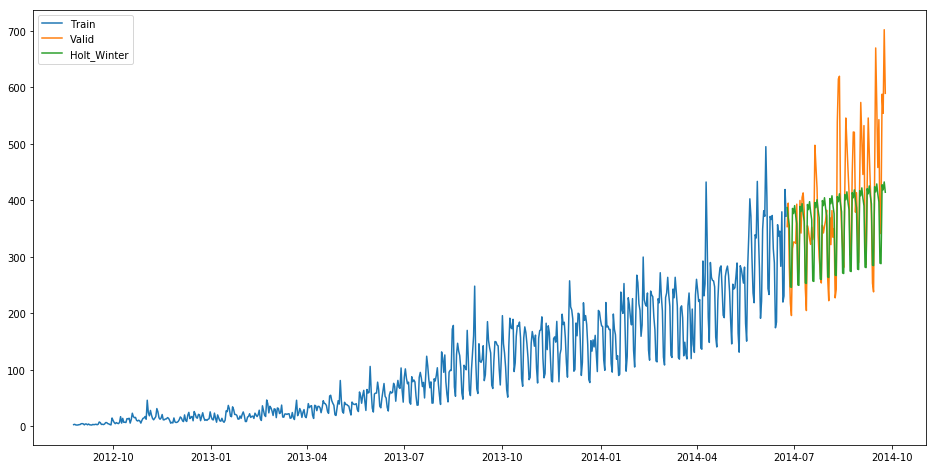

In [81]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [82]:
predict=fit1.forecast(len(test))

In [98]:
test['prediction']=predict

In [101]:
# Merge Test and test_original on Day, month and year
merge=pd.merge(test, test_original, on=('Day','Month', 'Year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['Year', 'Month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [106]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['Day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')